# **Drive Mount**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Library Import**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# **Dataset Import**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/422 project test/New Brain Stroke.csv')
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,NaN,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,NaN,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,NaN,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [4]:
df.shape

(4981, 11)

# **Checking For Null Values**

In [5]:
print("Shape of the dataset before containing The null values",df.shape)
df.isnull().sum()

Shape of the dataset before containing The null values (4981, 11)


gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        7
avg_glucose_level     7
bmi                   0
smoking_status       13
stroke                0
dtype: int64

# **Removing Null Values**

In [6]:
df = df.dropna (axis = 0, subset = ['Residence_type', 'avg_glucose_level', 'smoking_status'])
print("Shape of the dataset after removing The null values",df.shape)
df.isnull().sum()



Shape of the dataset after removing The null values (4954, 11)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# **Unique Value Checking**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4954 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4954 non-null   object 
 1   age                4954 non-null   float64
 2   hypertension       4954 non-null   int64  
 3   heart_disease      4954 non-null   int64  
 4   ever_married       4954 non-null   object 
 5   work_type          4954 non-null   object 
 6   Residence_type     4954 non-null   object 
 7   avg_glucose_level  4954 non-null   float64
 8   bmi                4954 non-null   float64
 9   smoking_status     4954 non-null   object 
 10  stroke             4954 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 464.4+ KB


In [8]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [11]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'Unknown', 'smokes'],
      dtype=object)

# **Encoding the Data**

In [13]:
enc = LabelEncoder()

X = df
X["gender"] = enc.fit_transform(df['gender'])
X["ever_married"] = enc.fit_transform(df['ever_married'])
X["work_type"] = enc.fit_transform(df['work_type'])
X["Residence_type"] = enc.fit_transform(df['Residence_type'])
X["smoking_status"] = enc.fit_transform(df['smoking_status'])

In [14]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
6,0,69.0,0,0,0,1,1,94.39,22.8,2,1


# **Displaying the Correlation between our Data (Both Input and Output)**

<Axes: >

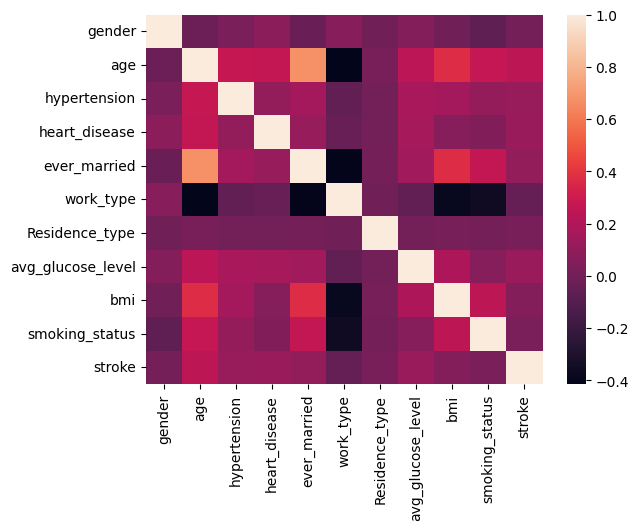

In [15]:
co = X.corr()
sns.heatmap(co)

<Axes: >

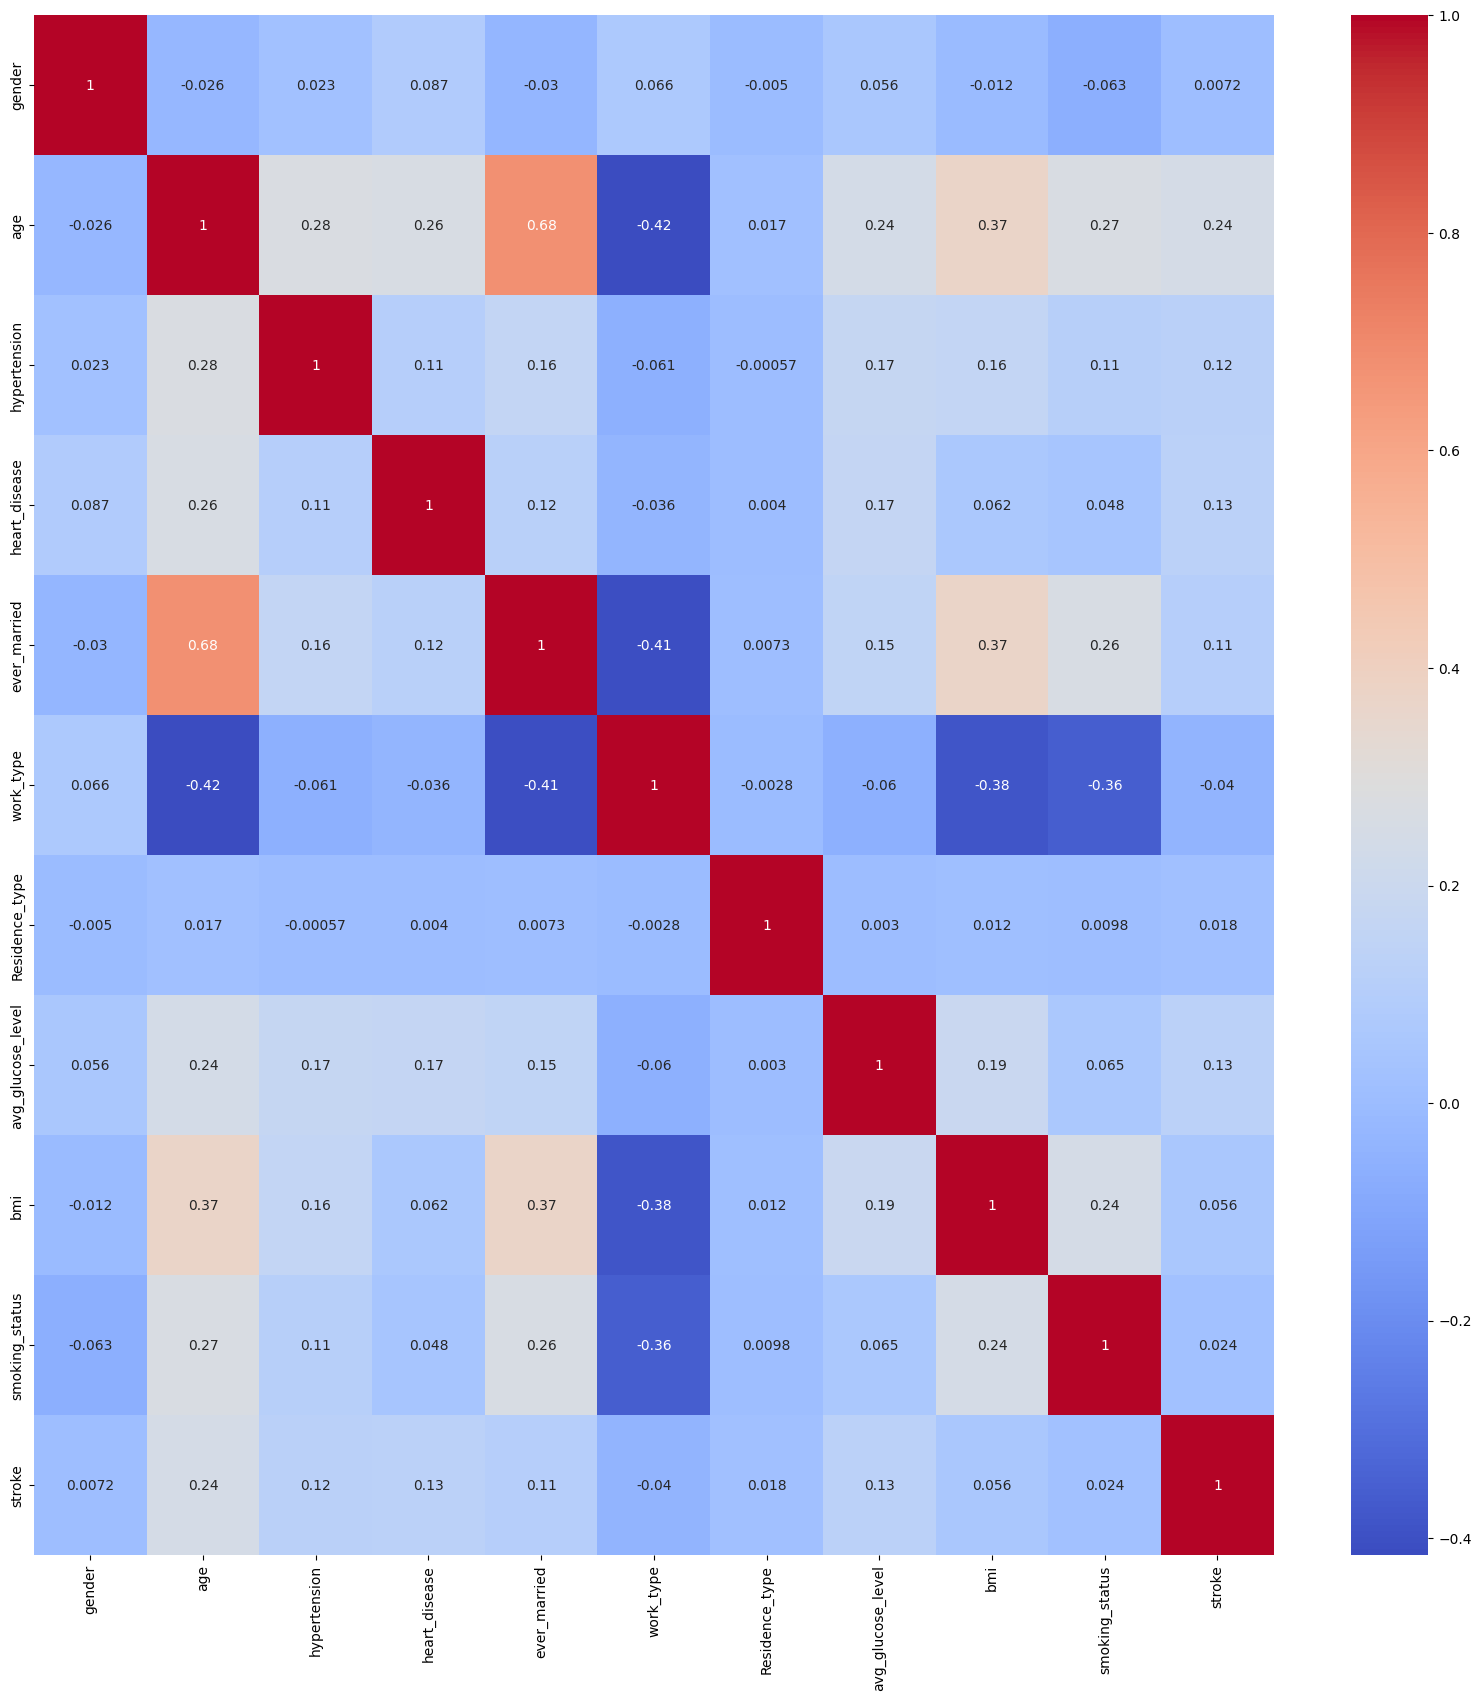

In [16]:
corr=X.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# **Comparison of the number of instances of our unique classes**

Count of "yes": 241
Count of "no": 4713


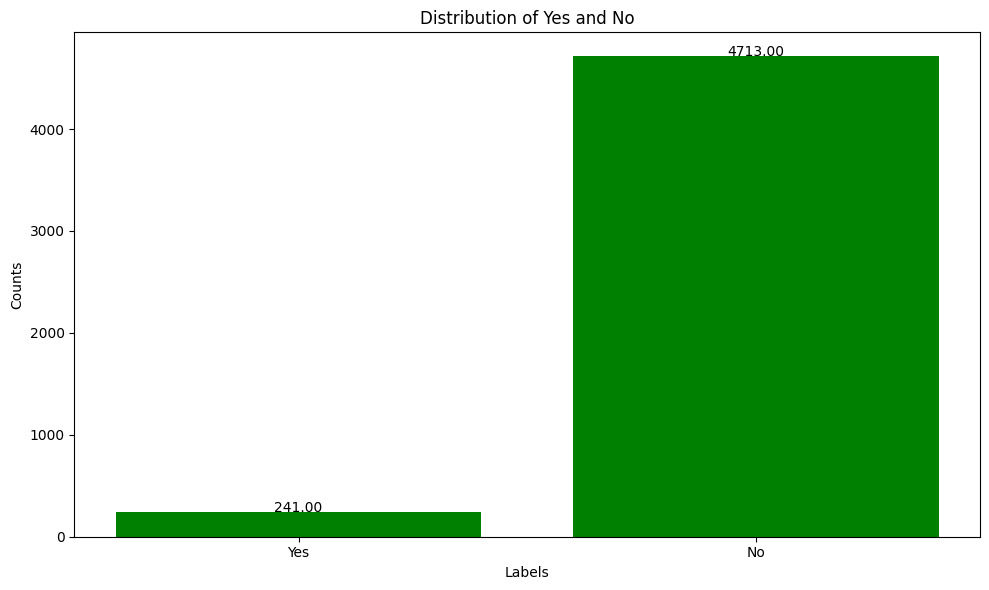

In [17]:
yes_count = X['stroke'].eq(1).sum()
no_count = X['stroke'].eq(0).sum()

print(f'Count of "yes": {yes_count}')
print(f'Count of "no": {no_count}')

labels = ["Yes","No"]
counts = [yes_count, no_count]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='green')

plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Yes and No')


for i, value in enumerate(counts):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()

# **Creating the Output Data**

In [18]:
Y = pd.DataFrame(X['stroke'])
Y

,stroke
0,1
1,1
3,1
4,1
6,1
...,...
4976,0
4977,0
4978,0
4979,0


# **Removing the Output Column from our Features**

In [19]:
X.drop('stroke', axis = 1, inplace = True)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2
3,0,79.0,1,0,1,2,0,174.12,24.0,2
4,1,81.0,0,0,1,1,1,186.21,29.0,1
6,0,69.0,0,0,0,1,1,94.39,22.8,2
...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1
4977,1,40.0,0,0,1,1,1,191.15,31.1,3
4978,0,45.0,1,0,1,0,0,95.02,31.8,3
4979,1,40.0,0,0,1,1,0,83.94,30.0,3


# **Splitting our Dataset**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.30)

# **Sampling Our Dataset**

In [21]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
# Assuming y_train is your original labels for training data

# Count the occurrences of each class before oversampling
unique_classes_before, class_counts_before = np.unique(y_train, return_counts=True)
class_distribution_before = dict(zip(unique_classes_before, class_counts_before))

# Oversampling
oversampler = RandomOverSampler()
X_resampled_over, y_resampled_over = oversampler.fit_resample(X_train, y_train)

# Count the occurrences of each class after oversampling
unique_classes_after, class_counts_after = np.unique(y_resampled_over, return_counts=True)
class_distribution_after = dict(zip(unique_classes_after, class_counts_after))

# Print class distributions before and after oversampling
print("Class distribution before oversampling:")
print(class_distribution_before)
print("\nClass distribution after oversampling:")
print(class_distribution_after)

X_resampled_over = X_train
y_resampled_over = y_train

Class distribution before oversampling:
{0: 3298, 1: 169}

Class distribution after oversampling:
{0: 3298, 1: 3298}


# **Scaling our Features**

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled

# **K - Nearest Neighbours (KNN) Model**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = knn.score(X_test, y_test)
print("KNN Accuracy: {:.2f}".format(knn_accuracy))
print("\n\n")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 0.95





# **Confusion Matrix, Precision, Recall and F1 Score for KNN Model**

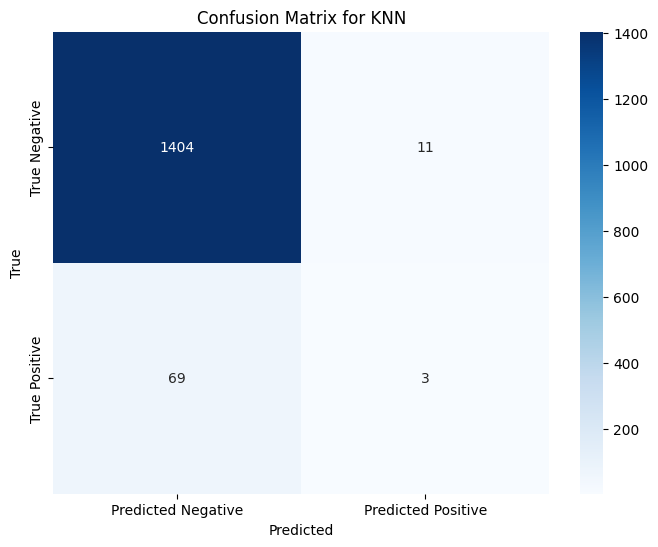

Precision: 0.21428571428571427
Recall: 0.041666666666666664
F1 Score: 0.06976744186046512


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming you have defined y_test and knn_predictions elsewhere

# Compute confusion matrix
cm = confusion_matrix(y_test, knn_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions)
f1 = f1_score(y_test, knn_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# **Decision Tree Model**

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

decision_tree_predictions = decision_tree.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
print("Decision Tree Accuracy:", decision_tree_accuracy)


Decision Tree Accuracy: 0.9018157363819771


# **Confusion Matrix, Precision, Recall and F1 Score for Decision Tree Model**

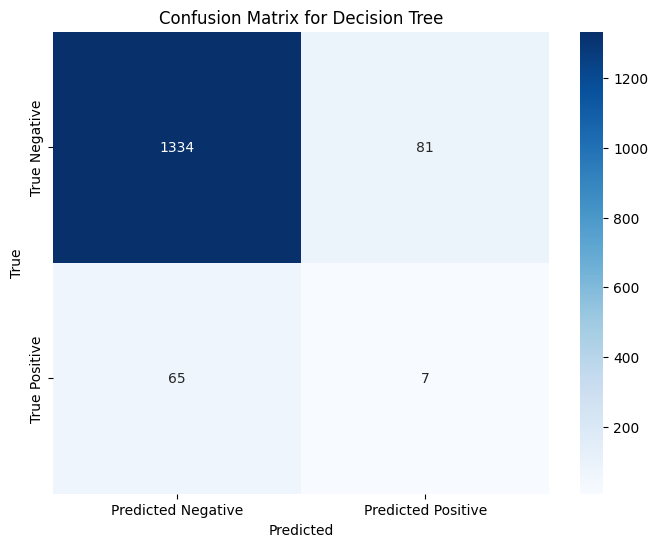

Precision: 0.07954545454545454
Recall: 0.09722222222222222
F1 Score: 0.08750000000000001


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming you have defined y_test and decision_tree_predictions elsewhere

# Compute confusion matrix
cm = confusion_matrix(y_test, decision_tree_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, decision_tree_predictions)
recall = recall_score(y_test, decision_tree_predictions)
f1 = f1_score(y_test, decision_tree_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# **Naive Bayes Model**

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

naive_bayes_predictions = naive_bayes.predict(X_test)

naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print("Accuracy:", naive_bayes_accuracy)


Accuracy: 0.8601210490921318


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Confusion Matrix, Precision, Recall and F1 Score for Naive Bayes Model**

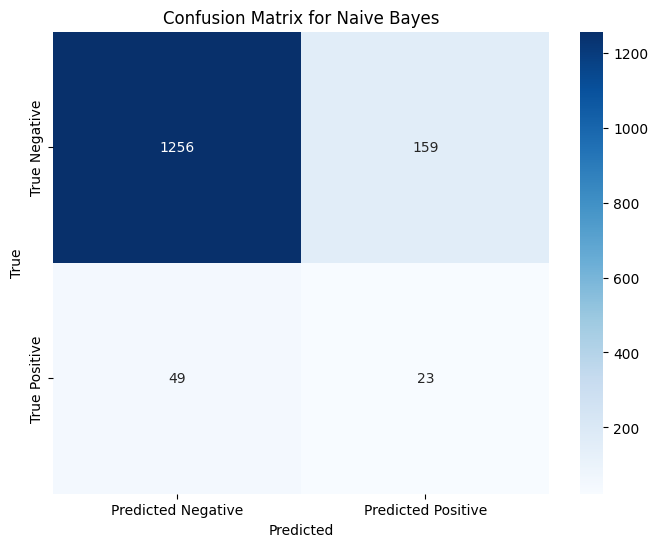

Precision: 0.12637362637362637
Recall: 0.3194444444444444
F1 Score: 0.1811023622047244


In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, naive_bayes_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

precision = precision_score(y_test, naive_bayes_predictions)
recall = recall_score(y_test, naive_bayes_predictions)
f1 = f1_score(y_test, naive_bayes_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# **Model Accuracy Comparison**


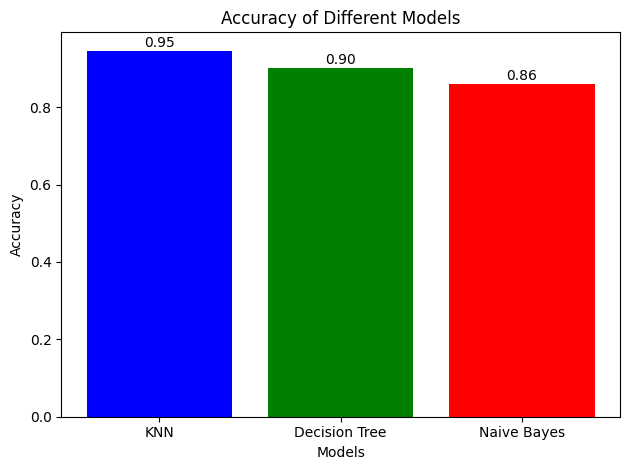

In [29]:
import matplotlib.pyplot as plt

model_names = ['KNN', 'Decision Tree', 'Naive Bayes']
accuracy_values = [knn_accuracy, decision_tree_accuracy, naive_bayes_accuracy]
colors = ['blue', 'green', 'red']
plt.bar(model_names, accuracy_values, color=colors)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()
